In [2]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from kan import KAN
import matplotlib.pyplot as plt
from sklearn.utils import resample
# Reading in csv
df = pd.read_csv('chop_simple_data3.csv')

pk_columns = ['Number of 3-gons', 'Number of 4-gons', 'Number of 5-gons', 
              'Number of 6-gons', 'Number of 7-gons', 'Number of 8-gons', 
              'Number of 9-gons', 'Number of 10-gons', 'Number of 11-gons', 
              'Number of 12-gons']
for n in range(13, 126):
    pk_columns.append(f'Number of {n}-gons')

df = df[pk_columns]

for k in range(3,126):
    df = pd.read_csv('chop_simple_data3.csv')
    df = df[pk_columns]
    column_name = f'Number of {k}-gons'
    if column_name in df.columns:
        df = df.drop(columns=column_name)
    X = df.values
    y = np.full(X.shape[0], 1)
    model = LinearRegression(fit_intercept=False)
    model.fit(X, y)
    coefficients = model.coef_
    flag=0
    predictions = model.predict(X)
    for i, (real, pred) in enumerate(zip(y, predictions)):
        if not np.isclose(real, pred, atol=1e-20):
            flag=1
    if flag==0:
        print("find the rule")
        print(f"constant={k}")
        print("The coefficient is:")
        for col, coef in zip(df.columns, coefficients):
                    print(f"{col}: {coef}")


In [2]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from kan import KAN
import matplotlib.pyplot as plt
from sklearn.utils import resample
# Reading in csv
df = pd.read_csv('chop_simple_data3.csv')

pk_columns = ['Number of 3-gons', 'Number of 4-gons', 'Number of 5-gons', 
              'Number of 6-gons', 'Number of 7-gons', 'Number of 8-gons', 
              'Number of 9-gons', 'Number of 10-gons', 'Number of 11-gons', 
              'Number of 12-gons']
for n in range(13, 126):
    pk_columns.append(f'Number of {n}-gons')

df = df[pk_columns]

In [29]:
df = pd.read_csv('chop_simple_data3.csv')
df.columns
df['Adjacency Matrix']

0       [[0, 1, 1, 1, 0, 0], [1, 0, 1, 0, 0, 1], [1, 1...
1       [[0, 1, 1, 1, 0, 0, 0, 0], [1, 0, 1, 0, 1, 0, ...
2       [[0, 1, 1, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 1, ...
3       [[0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, ...
4       [[0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [...
                              ...                        
4365    [[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
4366    [[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
4367    [[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
4368    [[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
4369    [[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
Name: Adjacency Matrix, Length: 4370, dtype: object

In [85]:
import ast
import numpy as np
import pandas as pd

# 定义函数来处理字符串，确保转换为 numpy array
def ensure_numpy_array(matrix):
    # 如果是字符串，先尝试转换为列表
    if isinstance(matrix, str):
        try:
            matrix = ast.literal_eval(matrix)  # 将字符串解析成列表
        except:
            print("Error: Unable to parse string to list.")
            return np.array([])  # 返回一个空数组以避免出错
    return np.array(matrix)

# 强制将每个元素转换为 numpy array
df['Adjacency Matrix'] = df['Adjacency Matrix'].apply(ensure_numpy_array)

# 再次检查每个元素的维度
print(df['Adjacency Matrix'].apply(lambda x: x.ndim if isinstance(x, np.ndarray) else "Not an array").head())

0    2
1    2
2    2
3    2
4    2
Name: Adjacency Matrix, dtype: int64


## Step 1

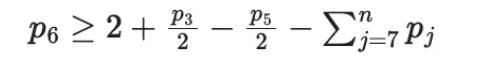

In [30]:
# Assuming 'df' is already defined and contains the columns as per your data.
# Step 1
def verify_theorem_1(df):
    # Calculating the LHS and RHS of the inequality in Theorem 1
    df['Theorem_1_LHS'] = df['Number of 6-gons']
    df['Theorem_1_RHS'] = 2 + df['Number of 3-gons'] / 2 - df['Number of 5-gons'] / 2

    # Adding the summation term for columns 7 to 125
    summation_columns = [f'Number of {j}-gons' for j in range(7, 126) if f'Number of {j}-gons' in df.columns]
    df['Summation_pj'] = df[summation_columns].sum(axis=1)
    df['Theorem_1_RHS'] -= df['Summation_pj']

    # Checking both conditions
    df['Condition_1'] = df['Theorem_1_LHS'] >= df['Theorem_1_RHS']
    df['Condition_2'] = df['Summation_pj'] < 3
    df['Theorem_1_Valid'] = 1
    df['Theorem_1_Valid'] = df['Condition_2'] |df['Condition_1']



    # Printing results
    print(df['Theorem_1_Valid'].value_counts())
    invalid_rows = df.loc[~df['Theorem_1_Valid']]
    print("The rows that do not satisfy Theorem 1:")
    print(invalid_rows.index.tolist())
    
    return df['Theorem_1_Valid'].all()

# Execute verification
theorem_1_valid = verify_theorem_1(df)
if theorem_1_valid:
    print("Theorem 1 is valid for all data points.")
else:
    print("Some data points do not satisfy Theorem 1.")

Theorem_1_Valid
True    4370
Name: count, dtype: int64
The rows that do not satisfy Theorem 1:
[]
Theorem 1 is valid for all data points.


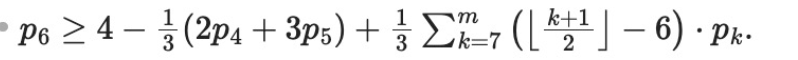

In [89]:
import numpy as np

def verify_theorem_2(df):
    df['Theorem_2_LHS'] = df['Number of 6-gons']  
    df['Theorem_2_RHS'] = 4 - (1/3) * (2 * df['Number of 4-gons'] + 3 * df['Number of 5-gons'])  # 4 - 1/3(2*p4 + 3*p5)
    summation_columns = [f'Number of {j}-gons' for j in range(3, 126) if f'Number of {j}-gons' in df.columns]
    df['Summation_pj'] = df[summation_columns].sum(axis=1)
    for k in range(7, 126):
        column_name = f'Number of {k}-gons'
        if column_name in df.columns:
            summation_term = (np.floor((k + 1) / 2) - 6) * df[column_name]
            df['Theorem_2_RHS'] += (1/3) * summation_term
    df['Condition_1'] = df['Theorem_2_LHS'] >= df['Theorem_2_RHS']
    df['Condition_2'] = df['Summation_pj'] < 7
    df['Theorem_2_Valid'] = 1
    df['Theorem_2_Valid'] = df['Condition_2'] |df['Condition_1']
    invalid_rows = df.loc[~df['Theorem_2_Valid']]

    print("The rows that do not satisfy Theorem 2:")
    print(invalid_rows.index.tolist())
    print(invalid_rows)
    print(df['Theorem_2_Valid'].value_counts())
    return df['Theorem_2_Valid'].all()
# Verify Theorem 2
theorem_2_valid = verify_theorem_2(df)
if theorem_2_valid:
    print("Theorem 2 is valid for all data points.")


The rows that do not satisfy Theorem 2:
[3, 50, 70, 690, 691]
                                      Adjacency Matrix  Number of 3-gons  \
3    [[0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, ...               2.0   
50   [[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...               8.0   
70   [[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...               6.0   
690  [[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...              20.0   
691  [[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...              20.0   

     Number of 4-gons  Number of 5-gons  Number of 6-gons  Number of 7-gons  \
3                 4.0               0.0               0.0               2.0   
50                1.0               0.0               0.0               0.0   
70                1.0               0.0               1.0               1.0   
690               1.0               0.0               0.0               0.0   
691               2.0               0.0               0.0               0.0   

     N

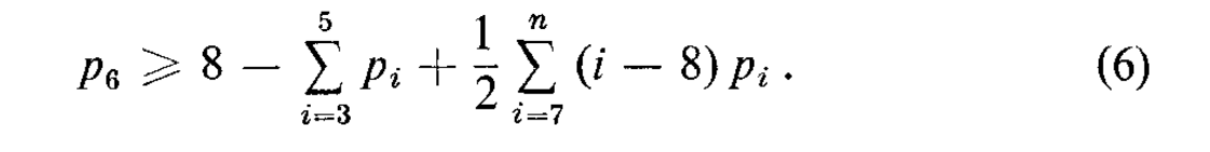

In [87]:
import numpy as np

def verify_theorem_3(df):
    df['Theorem_2_LHS'] = df['Number of 6-gons']  
    df['Theorem_2_RHS'] = 8 - df['Number of 3-gons'] -df['Number of 4-gons'] -df['Number of 5-gons']  # 4 - (p3+p4+p5)
    summation_columns = [f'Number of {j}-gons' for j in range(7, 126) if f'Number of {j}-gons' in df.columns]
    df['Summation_pj'] = df[summation_columns].sum(axis=1)
    for k in range(7, 126):
        column_name = f'Number of {k}-gons'
        if column_name in df.columns:
            df['Theorem_2_RHS'] += (1/2) * (k-8)*df[column_name]
    df['Condition_1'] = df['Theorem_2_LHS'] >= df['Theorem_2_RHS']
    df['Condition_2'] = df['Summation_pj'] < 3
    df['Theorem_3_Valid'] = 1
    df['Theorem_3_Valid'] = df['Condition_2'] |df['Condition_1']
    invalid_rows = df.loc[~df['Theorem_3_Valid']]

    print("The rows that do not satisfy Theorem 3:")
    print(invalid_rows.index.tolist())
    print(invalid_rows)
    print(df['Theorem_3_Valid'].value_counts())
    return df['Theorem_3_Valid'].all()
# Verify Theorem 2
theorem_3_valid = verify_theorem_3(df)
if theorem_3_valid:
    print("Theorem 3 is valid for all data points.")


The rows that do not satisfy Theorem 3:
[]
Empty DataFrame
Columns: [Adjacency Matrix, Number of 3-gons, Number of 4-gons, Number of 5-gons, Number of 6-gons, Number of 7-gons, Number of 8-gons, Number of 9-gons, Number of 10-gons, Number of 11-gons, Number of 12-gons, Number of 13-gons, Number of 14-gons, Number of 15-gons, Number of 16-gons, Number of 17-gons, Number of 18-gons, Number of 19-gons, Number of 20-gons, Number of 21-gons, Number of 22-gons, Number of 23-gons, Number of 24-gons, Number of 25-gons, Number of 26-gons, Number of 27-gons, Number of 28-gons, Number of 29-gons, Number of 30-gons, Number of 31-gons, Number of 32-gons, Number of 33-gons, Number of 34-gons, Number of 35-gons, Number of 36-gons, Number of 37-gons, Number of 38-gons, Number of 39-gons, Number of 40-gons, Number of 41-gons, Number of 42-gons, Number of 43-gons, Number of 44-gons, Number of 45-gons, Number of 46-gons, Number of 47-gons, Number of 48-gons, Number of 49-gons, Number of 50-gons, Number o

# Original idea

## Replication of restriction1:

In [17]:
#add constraint to a7,a8,....,an
import numpy as np
import pandas as pd
from scipy.optimize import linprog

def solve_polygon_bounds(df, c_value, filtered=0,K=7,bound= (-5, None)):
    df = df.copy()
    df['Number of 2-gons'] = 1
    summation_columns = [f'Number of {j}-gons' for j in range(3, 126) if f'Number of {j}-gons' in df.columns]
    df['Summation_pj'] = df[summation_columns].sum(axis=1)
    max_gons = pd.Series(index=df.index, dtype=int)
    for i, row in df.iterrows():
        max_gon = 2
        for j in range(3, 126):
            col_name = f'Number of {j}-gons'
            if col_name in df.columns and row[col_name] > 0:
                max_gon = j
        max_gons[i] = max_gon
    valid_rows = (max_gons <= K) & (df['Summation_pj'] >= filtered)
    filtered_df = df[valid_rows] 
    print(f"Original data row count: {len(df)}")
    print(f"Filtered data row count: {len(filtered_df)}")
    if len(filtered_df) == 0:
        print(f"Error: No data meets the condition K={K}")
        return None
    variable_indices = [j for j in range(2, K+1) if j != 6]
    num_variables = len(variable_indices)
    c=c_value
    A_ub = []
    b_ub = []
    for i, row in filtered_df.iterrows():
        p6i = row['Number of 6-gons']
        pji = []
        for j in variable_indices:
            col_name = f'Number of {j}-gons'
            pji.append(row[col_name] if col_name in filtered_df.columns else 0)
        A_ub.append(pji)
        b_ub.append(p6i)
    A_ub = np.array(A_ub)
    b_ub = np.array(b_ub)
    print(f"Constraint matrix shape: {A_ub.shape}")
    print(f"Number of objective function coefficients: {len(c)}")
    result = linprog(c, A_ub=A_ub, b_ub=b_ub,bounds=bound, method='highs')
    if result.success:
        print(f"\nOptimal solution found for K={K}")
        print("Coefficient values aj:")
        for idx, j in enumerate(variable_indices):
            print(f"a{j} = {result.x[idx]:.4f}")
    else:
        print("\nOptimal solution not found")
        print(f"Solver status: {result.status}")
        print(f"Solver message: {result.message}")
    return result


In [18]:
## Jucovic Theorem
K=126 #You can define how many number of polygons you'd like to analyze
num_variables = K-2 
bounds = [(0, 5)] * num_variables #Constraints of a_i
c = -np.ones(num_variables) #To change the coefficient of every parameter a_j, while the original problem is to maximize, and linprog is to minimize, we use minus here.
for i in range(10): 
    bounds[i] = (-np.inf, 0) ##Can change the constraints
bounds[0]=(4,4.001)
bounds[1]=(0,0)
for i in range(4,K-2,1):
    bounds[i]=(((i+1)/2-6)/3,((i+1)/2-6)/3)
result = solve_polygon_bounds(df, c_value=c, filtered=7, bound=bounds,K=K)

Original data row count: 4370
Filtered data row count: 4367
Constraint matrix shape: (4367, 124)
Number of objective function coefficients: 124

Optimal solution found for K=126
Coefficient values aj:
a2 = 4.0010
a3 = 0.0000
a4 = -0.6670
a5 = -1.0003
a7 = -1.1667
a8 = -1.0000
a9 = -0.8333
a10 = -0.6667
a11 = -0.5000
a12 = -0.3333
a13 = -0.1667
a14 = 0.0000
a15 = 0.1667
a16 = 0.3333
a17 = 0.5000
a18 = 0.6667
a19 = 0.8333
a20 = 1.0000
a21 = 1.1667
a22 = 1.3333
a23 = 1.5000
a24 = 1.6667
a25 = 1.8333
a26 = 2.0000
a27 = 2.1667
a28 = 2.3333
a29 = 2.5000
a30 = 2.6667
a31 = 2.8333
a32 = 3.0000
a33 = 3.1667
a34 = 3.3333
a35 = 3.5000
a36 = 3.6667
a37 = 3.8333
a38 = 4.0000
a39 = 4.1667
a40 = 4.3333
a41 = 4.5000
a42 = 4.6667
a43 = 4.8333
a44 = 5.0000
a45 = 5.1667
a46 = 5.3333
a47 = 5.5000
a48 = 5.6667
a49 = 5.8333
a50 = 6.0000
a51 = 6.1667
a52 = 6.3333
a53 = 6.5000
a54 = 6.6667
a55 = 6.8333
a56 = 7.0000
a57 = 7.1667
a58 = 7.3333
a59 = 7.5000
a60 = 7.6667
a61 = 7.8333
a62 = 8.0000
a63 = 8.1667
a64 

In [43]:
## Jucovic Theorem
K=126 #You can define how many number of polygons you'd like to analyze
num_variables = K-2 
bounds = [(0, 5)] * num_variables #Constraints of a_i
c = -np.ones(num_variables) #To change the coefficient of every parameter a_j, while the original problem is to maximize, and linprog is to minimize, we use minus here.
for i in range(10): 
    bounds[i] = (-np.inf, 0) ##Can change the constraints
bounds[0]=(4,4.001)
bounds[1]=(0,0)
for i in range(4,K-2,1):
    bounds[i]=((np.floor((i+4)/2)-6)/3,(np.floor((i+4)/2)-6)/3)
result = solve_polygon_bounds(df, c_value=c, filtered=7, bound=bounds,K=K)

Original data row count: 4370
Filtered data row count: 4367
Constraint matrix shape: (4367, 124)
Number of objective function coefficients: 124

Optimal solution found for K=126
Coefficient values aj:
a2 = 4.0000
a3 = 0.0000
a4 = -0.6667
a5 = -1.0000
a7 = -0.6667
a8 = -0.6667
a9 = -0.3333
a10 = -0.3333
a11 = 0.0000
a12 = 0.0000
a13 = 0.3333
a14 = 0.3333
a15 = 0.6667
a16 = 0.6667
a17 = 1.0000
a18 = 1.0000
a19 = 1.3333
a20 = 1.3333
a21 = 1.6667
a22 = 1.6667
a23 = 2.0000
a24 = 2.0000
a25 = 2.3333
a26 = 2.3333
a27 = 2.6667
a28 = 2.6667
a29 = 3.0000
a30 = 3.0000
a31 = 3.3333
a32 = 3.3333
a33 = 3.6667
a34 = 3.6667
a35 = 4.0000
a36 = 4.0000
a37 = 4.3333
a38 = 4.3333
a39 = 4.6667
a40 = 4.6667
a41 = 5.0000
a42 = 5.0000
a43 = 5.3333
a44 = 5.3333
a45 = 5.6667
a46 = 5.6667
a47 = 6.0000
a48 = 6.0000
a49 = 6.3333
a50 = 6.3333
a51 = 6.6667
a52 = 6.6667
a53 = 7.0000
a54 = 7.0000
a55 = 7.3333
a56 = 7.3333
a57 = 7.6667
a58 = 7.6667
a59 = 8.0000
a60 = 8.0000
a61 = 8.3333
a62 = 8.3333
a63 = 8.6667
a64 = 8

### Some Modification on Original one

In [43]:
## Jucovic Theorem - change the c according to the sign of coefficient
K=125 #You can define how many number of polygons you'd like to analyze
num_variables = K-2 
bounds = [(0, np.inf)] * num_variables #Constraints of a_i
c = -np.ones(num_variables) #To change the coefficient of every parameter a_j, while the original problem is to maximize, and linprog is to minimize, we use minus here.
print(c)
for i in range(10): 
    bounds[i] = (-np.inf, 0) ##Can change the constraints
bounds[0]=(1,1.001)
for i, bnd in enumerate(bounds):
    if bnd[0] is None and bnd[1] == 0:
        c[i] = 1 
    elif bnd[0] == 0 and bnd[1] is None:
        c[i] = -1  
print(bounds)
result = solve_polygon_bounds(df, c_value=c, filtered=7, bound=bounds,K=K)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[(1, 1.001), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf)

In [44]:
## Some interesting finding
K=125 #You can define how many number of polygons you'd like to analyze
num_variables = K-2 
bounds = [(-np.inf, 0)] * num_variables #Constraints of a_i
c = -np.ones(num_variables) #To change the coefficient of every parameter a_j, while the original problem is to maximize, and linprog is to minimize, we use minus here.
print(c)
for i in range(4): 
    bounds[i] = (0, np.inf) ##Can change the constraints
bounds[0]=(1,1.001)

print(bounds)
result = solve_polygon_bounds(df, c_value=c, filtered=10, bound=bounds,K=K)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[(1, 1.001), (0, inf), (0, inf), (0, inf), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf,

In [45]:
# Replication of theorm 1:
K=125 #You can define how many number of polygons you'd like to analyze
num_variables = K-2 
bounds = [(-np.inf, 0)] * num_variables #Constraints of a_i
c = -np.ones(num_variables) #To change the coefficient of every parameter a_j, while the original problem is to maximize, and linprog is to minimize, we use minus here.
print(c)
for i in range(3): 
    bounds[i] = (0, np.inf) ##Can change the constraints
bounds[0]=(1,1.001)
print(bounds)
result = solve_polygon_bounds(df, c_value=c, filtered=10, bound=bounds,K=K)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[(1, 1.001), (0, inf), (0, inf), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf

In [46]:
#If we adjust the coefficient according to the sign of coefficient.


K = 125  # You can define how many polygons you'd like to analyze
num_variables = K - 2
bounds = [(-np.inf, 0)] * num_variables  # Constraints of a_i
for i in range(3):
    bounds[i] = (0, np.inf)  # Can change the constraints
# Initialize the coefficients vector
c = -np.ones(num_variables)  # Start with all coefficients positive
bounds[0]=(1,1.001)
for i, bnd in enumerate(bounds):
    if bnd[0] is None and bnd[1] == 0:
        c[i] = 1 
    elif bnd[0] == 0 and bnd[1] is None:
        c[i] = -1  
print(c)
result = solve_polygon_bounds(df, c_value=c,filtered=10,bound=bounds, K=K)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
Original data row count: 4370
Filtered data row count: 4336
Constraint matrix shape: (4336, 123)
Number of objective function coefficients: 123

Optimal solution found for K=125
Coefficient values aj:
a2 = 1.0000
a3 = 0.0000
a4 = 0.0000
a5 = -0.5000
a7 = -0.1944
a8 = -0.3704
a9 = -0.1296
a10 = -0.1111
a11 = -0.1111
a12 = 0.0000
a13 = 0.0000
a14 = 0.0000
a15 = 0.0000
a16 = 0.0000
a17 = 0.0000
a18 = 0.0000
a19 = 0.0000
a20 = 0.0000
a21 = 0.0000
a22 = 0.0000
a23 = 0.0000
a24 = 0.0000
a25 = 0.0000
a

## Replication of restriction2

In [14]:
def solve_polygon_bounds_2(df, c_value, filtered=0,K=7,bound= (-5, None)):
    df = df.copy()
    df['Number of 2-gons'] = 1
    summation_columns = [f'Number of {j}-gons' for j in range(7, 126) if f'Number of {j}-gons' in df.columns]
    df['Summation_pj'] = df[summation_columns].sum(axis=1)
    max_gons = pd.Series(index=df.index, dtype=int)
    for i, row in df.iterrows():
        max_gon = 2
        for j in range(3, 126):
            col_name = f'Number of {j}-gons'
            if col_name in df.columns and row[col_name] > 0:
                max_gon = j
        max_gons[i] = max_gon
    valid_rows = (max_gons <= K) & (df['Summation_pj'] >= filtered)
    filtered_df = df[valid_rows] 
    print(f"Original data row count: {len(df)}")
    print(f"Filtered data row count: {len(filtered_df)}")
    if len(filtered_df) == 0:
        print(f"Error: No data meets the condition K={K}")
        return None
    variable_indices = [j for j in range(2, K+1) if j != 6]
    num_variables = len(variable_indices)
    c=c_value
    A_ub = []
    b_ub = []
    for i, row in filtered_df.iterrows():
        p6i = row['Number of 6-gons']
        pji = []
        for j in variable_indices:
            col_name = f'Number of {j}-gons'
            pji.append(row[col_name] if col_name in filtered_df.columns else 0)
        A_ub.append(pji)
        b_ub.append(p6i)
    A_ub = np.array(A_ub)
    b_ub = np.array(b_ub)
    print(f"Constraint matrix shape: {A_ub.shape}")
    print(f"Number of objective function coefficients: {len(c)}")
    result = linprog(c, A_ub=A_ub, b_ub=b_ub,bounds=bound, method='highs')
    if result.success:
        print(f"\nOptimal solution found for K={K}")
        print("Coefficient values aj:")
        for idx, j in enumerate(variable_indices):
            print(f"a{j} = {result.x[idx]:.4f}")
    else:
        print("\nOptimal solution not found")
    return result


In [23]:

K=50 #You can define how many number of polygons you'd like to analyze
num_variables = K-2 
bounds = [(-1, 0)] * num_variables #Constraints of a_i
c = np.zeros(num_variables) #To change the coefficient of every parameter a_j, while the original problem is to maximize, and linprog is to minimize, we use minus here.
for i in range(3): 
    bounds[i] = (0, np.inf) ##Can change the constraints
bounds[0]=(2,2.001)
bounds[3]=(-0.5,-0.5)
c[1]=-1
result = solve_polygon_bounds_2(df, c_value=c, filtered=3, bound=bounds,K=K)

Original data row count: 4370
Filtered data row count: 3001
Constraint matrix shape: (3001, 48)
Number of objective function coefficients: 48

Optimal solution found for K=50
Coefficient values aj:
a2 = 2.0000
a3 = 0.5000
a4 = 0.0000
a5 = -0.5000
a7 = -1.0000
a8 = -1.0000
a9 = -1.0000
a10 = -1.0000
a11 = -1.0000
a12 = -1.0000
a13 = -1.0000
a14 = -1.0000
a15 = -1.0000
a16 = -1.0000
a17 = -1.0000
a18 = -1.0000
a19 = -1.0000
a20 = -1.0000
a21 = -1.0000
a22 = -1.0000
a23 = -1.0000
a24 = -1.0000
a25 = -1.0000
a26 = -1.0000
a27 = -1.0000
a28 = -1.0000
a29 = -1.0000
a30 = -1.0000
a31 = -1.0000
a32 = -1.0000
a33 = -1.0000
a34 = -1.0000
a35 = -1.0000
a36 = -1.0000
a37 = -1.0000
a38 = -1.0000
a39 = -1.0000
a40 = -1.0000
a41 = -1.0000
a42 = -1.0000
a43 = -1.0000
a44 = -1.0000
a45 = -1.0000
a46 = -1.0000
a47 = -1.0000
a48 = -1.0000
a49 = -1.0000
a50 = 0.0000


In [49]:

K=125 #You can define how many number of polygons you'd like to analyze
num_variables = K-2 
bounds = [(-np.inf, 0)] * num_variables #Constraints of a_i
c = -np.ones(num_variables) #To change the coefficient of every parameter a_j, while the original problem is to maximize, and linprog is to minimize, we use minus here.
for i in range(3): 
    bounds[i] = (0, np.inf) ##Can change the constraints
bounds[0]=(1,1.001)
for i, bnd in enumerate(bounds):
    if bnd[0] is None and bnd[1] == 0:
        c[i] = 1 
    elif bnd[0] == 0 and bnd[1] is None:
        c[i] = -1  
result = solve_polygon_bounds_2(df, c_value=c, filtered=3, bound=bounds,K=K)

Original data row count: 4370
Filtered data row count: 3019
Constraint matrix shape: (3019, 123)
Number of objective function coefficients: 123

Optimal solution found for K=125
Coefficient values aj:
a2 = 1.0000
a3 = 0.0000
a4 = 0.0000
a5 = -0.3393
a7 = -0.3214
a8 = -0.1786
a9 = -0.1429
a10 = -0.2500
a11 = 0.0000
a12 = 0.0000
a13 = 0.0000
a14 = 0.0000
a15 = 0.0000
a16 = 0.0000
a17 = 0.0000
a18 = 0.0000
a19 = 0.0000
a20 = 0.0000
a21 = 0.0000
a22 = 0.0000
a23 = 0.0000
a24 = 0.0000
a25 = 0.0000
a26 = 0.0000
a27 = 0.0000
a28 = 0.0000
a29 = 0.0000
a30 = 0.0000
a31 = 0.0000
a32 = 0.0000
a33 = 0.0000
a34 = 0.0000
a35 = 0.0000
a36 = 0.0000
a37 = 0.0000
a38 = 0.0000
a39 = 0.0000
a40 = 0.0000
a41 = 0.0000
a42 = 0.0000
a43 = 0.0000
a44 = 0.0000
a45 = 0.0000
a46 = 0.0000
a47 = 0.0000
a48 = 0.0000
a49 = 0.0000
a50 = 0.0000
a51 = 0.0000
a52 = 0.0000
a53 = 0.0000
a54 = 0.0000
a55 = 0.0000
a56 = 0.0000
a57 = 0.0000
a58 = 0.0000
a59 = 0.0000
a60 = 0.0000
a61 = 0.0000
a62 = 0.0000
a63 = 0.0000
a64 = 0.

In [50]:

K=125 #You can define how many number of polygons you'd like to analyze
num_variables = K-2 
bounds = [(-np.inf, 0)] * num_variables #Constraints of a_i
c = -np.ones(num_variables) #To change the coefficient of every parameter a_j, while the original problem is to maximize, and linprog is to minimize, we use minus here.
print(c)
for i in range(3): 
    bounds[i] = (0, np.inf) ##Can change the constraints
bounds[0]=(1,1.001)
bounds[2]=(0,0)
print(bounds)
result = solve_polygon_bounds_2(df, c_value=c, filtered=3, bound=bounds,K=K)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[(1, 1.001), (0, inf), (0, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 

## Replication of Theorem 3

In [21]:

K=50 #You can define how many number of polygons you'd like to analyze
num_variables = K-2 
bounds = [(0, np.inf)] * num_variables #Constraints of a_i
c = -np.ones(num_variables) #To change the coefficient of every parameter a_j, while the original problem is to maximize, and linprog is to minimize, we use minus here.
print(c)
for i in range(5): 
    bounds[i] = (None,0) ##Can change the constraints
bounds[0]=(-np.inf,np.inf)
for i in range(4,K-2,1):
    bounds[i]=((i-8)/2,(i-8)/2)
bounds[3]=(-1,-1)
result = solve_polygon_bounds_2(df, c_value=c, filtered=3, bound=bounds,K=K)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
Original data row count: 4370
Filtered data row count: 3001
Constraint matrix shape: (3001, 48)
Number of objective function coefficients: 48

Optimal solution found for K=50
Coefficient values aj:
a2 = 28.2143
a3 = -6.7143
a4 = -1.9286
a5 = -1.0000
a7 = -2.0000
a8 = -1.5000
a9 = -1.0000
a10 = -0.5000
a11 = 0.0000
a12 = 0.5000
a13 = 1.0000
a14 = 1.5000
a15 = 2.0000
a16 = 2.5000
a17 = 3.0000
a18 = 3.5000
a19 = 4.0000
a20 = 4.5000
a21 = 5.0000
a22 = 5.5000
a23 = 6.0000
a24 = 6.5000
a25 = 7.0000
a26 = 7.5000
a27 = 8.0000
a28 = 8.5000
a29 = 9.0000
a30 = 9.5000
a31 = 10.0000
a32 = 10.5000
a33 = 11.0000
a34 = 11.5000
a35 = 12.0000
a36 = 12.5000
a37 = 13.0000
a38 = 13.5000
a39 = 14.0000
a40 = 14.5000
a41 = 15.0000
a42 = 15.5000
a43 = 16.0000
a44 = 16.5000
a45 = 17.0000
a46 = 17.5000
a47 = 18.0000
a48

In [52]:
df.describe()

,Number of 3-gons,Number of 4-gons,Number of 5-gons,Number of 6-gons,Number of 7-gons,Number of 8-gons,Number of 9-gons,Number of 10-gons,Number of 11-gons,Number of 12-gons,...,Number of 121-gons,Number of 122-gons,Number of 123-gons,Number of 124-gons,Number of 125-gons,Theorem_1_LHS,Theorem_1_RHS,Summation_pj,Theorem_2_LHS,Theorem_2_RHS
count,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,...,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000
mean,4.959497,16.366133,10.002517,6.158124,2.782609,1.584668,0.664073,0.287185,0.209611,0.109153,...,0.004119,0.005263,0.005492,0.003661,0.004119,6.158124,-6.767048,43.731808,6.158124,-7.558581
std,3.033944,30.449032,7.213181,6.400778,2.765558,1.845433,1.033304,0.913090,0.597545,0.345303,...,0.070841,0.078436,0.082682,0.064082,0.067533,6.400778,6.136622,27.594511,6.400778,10.477854
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.000000,5.000000,0.000000,-126.000000
25%,3.000000,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-10.000000,27.000000,2.000000,-10.500000
50%,5.000000,1.000000,8.000000,6.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,-5.000000,35.000000,6.000000,-5.000000
75%,7.000000,11.000000,14.000000,9.000000,4.000000,3.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,-2.000000,48.000000,9.000000,-2.000000
max,41.000000,123.000000,34.000000,110.000000,28.000000,9.000000,6.000000,15.000000,9.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,110.000000,3.000000,135.000000,110.000000,3.000000


In [22]:

K=50 #You can define how many number of polygons you'd like to analyze
num_variables = K-2 
bounds = [(0, np.inf)] * num_variables #Constraints of a_i
c = -np.ones(num_variables) #To change the coefficient of every parameter a_j, while the original problem is to maximize, and linprog is to minimize, we use minus here.
print(c)
for i in range(5): 
    bounds[i] = (None,0) ##Can change the constraints
bounds[0]=(8,8.001)
for i in range(4,K-2,1):
    bounds[i]=((i+3-8)/2,(i+3-8)/2)
bounds[1]=(-1,-1)
bounds[1]=(-1,-1)
bounds[3]=(-1,-1)
result = solve_polygon_bounds_2(df, c_value=c, filtered=3, bound=bounds,K=K)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
Original data row count: 4370
Filtered data row count: 3001
Constraint matrix shape: (3001, 48)
Number of objective function coefficients: 48

Optimal solution found for K=50
Coefficient values aj:
a2 = 8.0000
a3 = -1.0000
a4 = -1.0000
a5 = -1.0000
a7 = -0.5000
a8 = 0.0000
a9 = 0.5000
a10 = 1.0000
a11 = 1.5000
a12 = 2.0000
a13 = 2.5000
a14 = 3.0000
a15 = 3.5000
a16 = 4.0000
a17 = 4.5000
a18 = 5.0000
a19 = 5.5000
a20 = 6.0000
a21 = 6.5000
a22 = 7.0000
a23 = 7.5000
a24 = 8.0000
a25 = 8.5000
a26 = 9.0000
a27 = 9.5000
a28 = 10.0000
a29 = 10.5000
a30 = 11.0000
a31 = 11.5000
a32 = 12.0000
a33 = 12.5000
a34 = 13.0000
a35 = 13.5000
a36 = 14.0000
a37 = 14.5000
a38 = 15.0000
a39 = 15.5000
a40 = 16.0000
a41 = 16.5000
a42 = 17.0000
a43 = 17.5000
a44 = 18.0000
a45 = 18.5000
a46 = 19.0000
a47 = 19.5000
a48 

# p_6>0

In [53]:
def solve_polygon_bounds_3(df, c_value, filtered=0,K=7,bound= (-5, None)):
    df = df.copy()
    df['Number of 2-gons'] = 1
    summation_columns = [f'Number of {j}-gons' for j in range(7, 126) if f'Number of {j}-gons' in df.columns]
    df['Summation_pj'] = df[summation_columns].sum(axis=1)
    max_gons = pd.Series(index=df.index, dtype=int)
    for i, row in df.iterrows():
        max_gon = 2
        for j in range(3, 126):
            col_name = f'Number of {j}-gons'
            if col_name in df.columns and row[col_name] > 0:
                max_gon = j
        max_gons[i] = max_gon
    valid_rows = (max_gons <= K) & (df['Summation_pj'] >= filtered)& (df['Number of 6-gons'] > 0)
    filtered_df = df[valid_rows] 
    print(f"Original data row count: {len(df)}")
    print(f"Filtered data row count: {len(filtered_df)}")
    if len(filtered_df) == 0:
        print(f"Error: No data meets the condition K={K}")
        return None
    variable_indices = [j for j in range(2, K+1) if j != 6]
    num_variables = len(variable_indices)
    c=c_value
    A_ub = []
    b_ub = []
    for i, row in filtered_df.iterrows():
        p6i = row['Number of 6-gons']
        pji = []
        for j in variable_indices:
            col_name = f'Number of {j}-gons'
            pji.append(row[col_name] if col_name in filtered_df.columns else 0)
        A_ub.append(pji)
    b_ub.append(p6i)
    A_ub = np.array(A_ub)
    b_ub = np.array(b_ub)
    print(f"Constraint matrix shape: {A_ub.shape}")
    print(f"Number of objective function coefficients: {len(c)}")
    result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bound, method='highs')
    if result.success:
        print(f"\nOptimal solution found for K={K}")
        print("Coefficient values aj:")
        for idx, j in enumerate(variable_indices):
            print(f"a{j} = {result.x[idx]:.4f}")
    else:
        print("\nOptimal solution not found")
    return result


In [54]:
K=125 #You can define how many number of polygons you'd like to analyze
num_variables = K-2 
bounds = [(-np.inf, 0)] * num_variables #Constraints of a_i
c = -np.ones(num_variables) #To change the coefficient of every parameter a_j, while the original problem is to maximize, and linprog is to minimize, we use minus here.
print(c)
for i in range(3): 
    bounds[i] = (0, np.inf) ##Can change the constraints
bounds[0]=(1,1.001)
print(bounds)
result = solve_polygon_bounds_3(df, c_value=c, filtered=3, bound=bounds,K=K)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[(1, 1.001), (0, inf), (0, inf), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf

# New idea on construction

In [5]:
import numpy as np
import pandas as pd
from scipy.optimize import linprog

def solve_min_max_error(df, K=7, filtered=0, bound=(-5, None)):
    df = df.copy()
    
    # Ensure 'Number of 2-gons' exists
    df['Number of 2-gons'] = 1
    
    # Sum of higher-order gons for filtering
    summation_columns = [f'Number of {j}-gons' for j in range(3, 126) if f'Number of {j}-gons' in df.columns]
    df['Summation_pj'] = df[summation_columns].sum(axis=1)
    
    # Determine maximum gon per row
    max_gons = df.apply(
        lambda row: max([j for j in range(2, 126) if f'Number of {j}-gons' in df.columns and row.get(f'Number of {j}-gons', 0) > 0], default=2),
        axis=1
    )
    
    # Filter rows based on K and other conditions
    valid_rows = (max_gons <= K) & (df['Summation_pj'] >= filtered) 
    filtered_df1 = df[valid_rows]
    print(len(filtered_df1))
    filtered_df = df[valid_rows].reset_index(drop=True)
    print(f"Original data row count: {len(df)}")
    print(f"Filtered data row count: {len(filtered_df)}")
    
    if len(filtered_df) == 0:
        print(f"Error: No data meets the condition K={K}")
        return None
    
    # Indices for variables a_j (excluding j=6)
    variable_indices = [j for j in range(2, K+1) if j != 6]
    num_a_j = len(variable_indices)
    num_samples = len(filtered_df)
    total_vars = num_a_j + num_samples + 1  # a_j variables, e_i variables, t variable
    
    # Objective function coefficients
    c = np.zeros(total_vars)
    c[-1] = 1  # Coefficient for t
    
    # Equality constraints (A_eq x = b_eq)
    A_eq = np.zeros((num_samples, total_vars))
    b_eq = np.zeros(num_samples)
    
    # Build A_eq and b_eq
    for i, row in filtered_df.iterrows():
        # Coefficients for a_j variables
        for idx, j in enumerate(variable_indices):
            col_name = f'Number of {j}-gons'
            A_eq[i, idx] = row.get(col_name, 0)
        
        # Coefficient for e_i variable
        A_eq[i, num_a_j + i] = 1
        
        # Right-hand side
        b_eq[i] = row['Number of 6-gons']
    
    # Inequality constraints (A_ub x <= b_ub)
    num_ineq = num_samples * 2  # e_i >= 0 and e_i - t <= 0 for each sample
    A_ub = np.zeros((num_ineq, total_vars))
    b_ub = np.zeros(num_ineq)
    
    # Build A_ub and b_ub
    for i in range(num_samples):
        # e_i >= 0 --> -e_i <= 0
        A_ub[i, num_a_j + i] = -1
        b_ub[i] = 0
        
        # e_i - t <= 0
        A_ub[num_samples + i, num_a_j + i] = 1
        A_ub[num_samples + i, -1] = -1
        b_ub[num_samples + i] = 0
    
    # Variable bounds
    variable_bounds = []
    # Bounds for a_j variables
    if isinstance(bound, tuple) and len(bound) == 2:
        # Use the same bound for all a_j variables
        for _ in range(num_a_j):
            lb, ub = bound
            # Replace None with np.inf
            lb = -np.inf if lb is None else lb
            ub = np.inf if ub is None else ub
            variable_bounds.append((lb, ub))
    elif isinstance(bound, list) and len(bound) == num_a_j:
        # Use provided bounds list for a_j variables
        for b in bound:
            if not isinstance(b, tuple) or len(b) != 2:
                raise ValueError("Each bound must be a tuple of length 2.")
            lb, ub = b
            # Replace None with np.inf
            lb = -np.inf if lb is None else lb
            ub = np.inf if ub is None else ub
            variable_bounds.append((lb, ub))
    else:
        raise ValueError("Invalid 'bound' parameter. It should be a tuple or a list of tuples of length equal to the number of a_j variables.")
    
    # Bounds for e_i variables (e_i >= 0)
    for _ in range(num_samples):
        variable_bounds.append((0, np.inf))
    # Bound for t (t >= 0)
    variable_bounds.append((0, np.inf))
    
    print(f"Total variables: {total_vars}")
    print(f"Total equality constraints: {num_samples}")
    print(f"Total inequality constraints: {num_ineq}")
    print(f"Length of variable_bounds: {len(variable_bounds)}")
    
    # Solve the LP
    result = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=variable_bounds, method='highs')
    
    if result.success:
        print(f"\nOptimal solution found for K={K}")
        # Extract a_j values
        a_j_values = result.x[:num_a_j]
        for idx, j in enumerate(variable_indices):
            print(f"a{j} = {a_j_values[idx]:.4f}")
        print(f"Minimum maximum error t = {result.x[-1]:.4f}")
    else:
        print("\nOptimal solution not found")
        print(f"Status: {result.message}")
    
    return result

## Replicate of Theorm 1

In [6]:
import numpy as np
K=50 #You can define how many number of polygons you'd like to analyze
num_variables = K-2 
bounds = [(-np.inf, np.inf)] * num_variables #Constraints of a_i
c = -np.ones(num_variables) #To change the coefficient of every parameter a_j, while the original problem is to maximize, and linprog is to minimize, we use minus here.
print(c)
for i in range(10): 
    bounds[i] = (-np.inf, 0) ##Can change the constraints
bounds[0]=(8,8.001)
# Example usage
result = solve_min_max_error(df, K=K, filtered=7, bound=bounds)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
3604
Original data row count: 4370
Filtered data row count: 3604
Total variables: 3653
Total equality constraints: 3604
Total inequality constraints: 7208
Length of variable_bounds: 3653

Optimal solution found for K=50
a2 = 8.0000
a3 = -2.8000
a4 = -0.7414
a5 = -0.9919
a7 = 0.0000
a8 = 0.0000
a9 = 0.0000
a10 = 0.0000
a11 = 0.0000
a12 = 0.0000
a13 = 3.5030
a14 = 1.4364
a15 = 4.2444
a16 = 2.1778
a17 = 4.9859
a18 = 2.9192
a19 = 5.7273
a20 = 3.4141
a21 = 6.7152
a22 = 4.1556
a23 = 7.4566
a24 = 4.8970
a25 = 8.1980
a26 = 5.6384
a27 = 8.9394
a28 = 6.3798
a29 = 9.6808
a30 = 7.1212
a31 = 10.4222
a32 = 7.8626
a33 = 11.1636
a34 = 8.6040
a35 = 11.9051
a36 = 9.3455
a37 = 12.6465
a38 = 10.0869
a39 = 13.3879
a40 = 10.8283
a41 = 14.1293
a42 = 11.5697
a43 = 14.8707
a44 = 12.3111
a45 = 15.6121
a46 = 13.0525
a47

In [6]:
import numpy as np
K=125 #You can define how many number of polygons you'd like to analyze
num_variables = K-2 
bounds = [(-np.inf,0)] * num_variables #Constraints of a_i
c = -np.ones(num_variables) #To change the coefficient of every parameter a_j, while the original problem is to maximize, and linprog is to minimize, we use minus here.
print(c)
for i in range(3): 
    bounds[i] = (0, np.inf) ##Can change the constraints
bounds[0]=(1,1.001)
# Example usage
result = solve_min_max_error(df, K=K, filtered=3, bound=bounds)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


NameError: name 'solve_min_max_error' is not defined

## Replication of Theorem 2

In [58]:
import numpy as np
import pandas as pd
from scipy.optimize import linprog

def solve_min_max_error_2(df, K=7, filtered=0, bound=(-5, None)):
    df = df.copy()
    
    # Ensure 'Number of 2-gons' exists
    df['Number of 2-gons'] = 1
    
    # Sum of higher-order gons for filtering
    summation_columns = [f'Number of {j}-gons' for j in range(7, 126) if f'Number of {j}-gons' in df.columns]
    df['Summation_pj'] = df[summation_columns].sum(axis=1)
    
    # Determine maximum gon per row
    max_gons = df.apply(
        lambda row: max([j for j in range(2, 126) if f'Number of {j}-gons' in df.columns and row.get(f'Number of {j}-gons', 0) > 0], default=2),
        axis=1
    )
    
    # Filter rows based on K and other conditions
    valid_rows = (max_gons <= K) & (df['Summation_pj'] >= filtered) 
    filtered_df1 = df[valid_rows]
    print(len(filtered_df1))
    filtered_df = df[valid_rows].reset_index(drop=True)
    print(f"Original data row count: {len(df)}")
    print(f"Filtered data row count: {len(filtered_df)}")
    
    if len(filtered_df) == 0:
        print(f"Error: No data meets the condition K={K}")
        return None
    
    # Indices for variables a_j (excluding j=6)
    variable_indices = [j for j in range(2, K+1) if j != 6]
    num_a_j = len(variable_indices)
    num_samples = len(filtered_df)
    total_vars = num_a_j + num_samples + 1  # a_j variables, e_i variables, t variable
    
    # Objective function coefficients
    c = np.zeros(total_vars)
    c[-1] = 1  # Coefficient for t
    
    # Equality constraints (A_eq x = b_eq)
    A_eq = np.zeros((num_samples, total_vars))
    b_eq = np.zeros(num_samples)
    
    # Build A_eq and b_eq
    for i, row in filtered_df.iterrows():
        # Coefficients for a_j variables
        for idx, j in enumerate(variable_indices):
            col_name = f'Number of {j}-gons'
            A_eq[i, idx] = row.get(col_name, 0)
        
        # Coefficient for e_i variable
        A_eq[i, num_a_j + i] = 1
        
        # Right-hand side
        b_eq[i] = row['Number of 6-gons']
    
    # Inequality constraints (A_ub x <= b_ub)
    num_ineq = num_samples * 2  # e_i >= 0 and e_i - t <= 0 for each sample
    A_ub = np.zeros((num_ineq, total_vars))
    b_ub = np.zeros(num_ineq)
    
    # Build A_ub and b_ub
    for i in range(num_samples):
        # e_i >= 0 --> -e_i <= 0
        A_ub[i, num_a_j + i] = -1
        b_ub[i] = 0
        
        # e_i - t <= 0
        A_ub[num_samples + i, num_a_j + i] = 1
        A_ub[num_samples + i, -1] = -1
        b_ub[num_samples + i] = 0
    
    # Variable bounds
    variable_bounds = []
    # Bounds for a_j variables
    if isinstance(bound, tuple) and len(bound) == 2:
        # Use the same bound for all a_j variables
        for _ in range(num_a_j):
            lb, ub = bound
            # Replace None with np.inf
            lb = -np.inf if lb is None else lb
            ub = np.inf if ub is None else ub
            variable_bounds.append((lb, ub))
    elif isinstance(bound, list) and len(bound) == num_a_j:
        # Use provided bounds list for a_j variables
        for b in bound:
            if not isinstance(b, tuple) or len(b) != 2:
                raise ValueError("Each bound must be a tuple of length 2.")
            lb, ub = b
            # Replace None with np.inf
            lb = -np.inf if lb is None else lb
            ub = np.inf if ub is None else ub
            variable_bounds.append((lb, ub))
    else:
        raise ValueError("Invalid 'bound' parameter. It should be a tuple or a list of tuples of length equal to the number of a_j variables.")
    
    # Bounds for e_i variables (e_i >= 0)
    for _ in range(num_samples):
        variable_bounds.append((0, np.inf))
    # Bound for t (t >= 0)
    variable_bounds.append((0, np.inf))
    
    print(f"Total variables: {total_vars}")
    print(f"Total equality constraints: {num_samples}")
    print(f"Total inequality constraints: {num_ineq}")
    print(f"Length of variable_bounds: {len(variable_bounds)}")
    
    # Solve the LP
    result = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=variable_bounds, method='highs')
    
    if result.success:
        print(f"\nOptimal solution found for K={K}")
        # Extract a_j values
        a_j_values = result.x[:num_a_j]
        for idx, j in enumerate(variable_indices):
            print(f"a{j} = {a_j_values[idx]:.4f}")
        print(f"Minimum maximum error t = {result.x[-1]:.4f}")
    else:
        print("\nOptimal solution not found")
        print(f"Status: {result.message}")
    
    return result

In [59]:

K=125 #You can define how many number of polygons you'd like to analyze
num_variables = K-2 
bounds = [(-np.inf, 0)] * num_variables #Constraints of a_i
for i in range(3): 
    bounds[i] = (0, np.inf) ##Can change the constraints
bounds[0]=(1,1.001)
print(bounds)
result = solve_min_max_error_2(df, filtered=3, bound=bounds,K=K)

[(1, 1.001), (0, inf), (0, inf), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0),

In [60]:

K=125 #You can define how many number of polygons you'd like to analyze
num_variables = K-2 
bounds = [(-np.inf, 0)] * num_variables #Constraints of a_i
for i in range(3): 
    bounds[i] = (0, np.inf) ##Can change the constraints
bounds[0]=(1,1.001)
bounds[2]=(0,0)
print(bounds)
result = solve_min_max_error_2(df, filtered=3, bound=bounds,K=K)

[(1, 1.001), (0, inf), (0, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (-inf, 0), (

## Replication theorem 3

In [61]:

K=125 #You can define how many number of polygons you'd like to analyze
num_variables = K-2 
bounds = [(0, np.inf)] * num_variables #Constraints of a_i
c = -np.ones(num_variables) #To change the coefficient of every parameter a_j, while the original problem is to maximize, and linprog is to minimize, we use minus here.
print(c)
for i in range(5): 
    bounds[i] = (None,0) ##Can change the constraints
bounds[0]=(1,1.001)
print(bounds)
result = solve_min_max_error_2(df, filtered=3, bound=bounds,K=K)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[(1, 1.001), (None, 0), (None, 0), (None, 0), (None, 0), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0, inf), (0,

In [151]:
## Some updation

## Keep a_2>0, maximize a_3.

K=125 #You can define how many number of polygons you'd like to analyze
num_variables = K-2 
bounds = [(-5, np.inf)] * num_variables #Constraints of a_i
c = -np.zeros(num_variables) #To change the coefficient of every parameter a_j, while the original problem is to maximize, and linprog is to minimize, we use minus here.
print(c)
bounds[0]=(1,1.001)
c[1]=-1
result = solve_polygon_bounds(df, c_value=c, filtered=0, bound=bounds,K=K)

## If we don't get any constraint here, the optimal situation, we still needs choose a_3 to become a negative number compared to our scenario.


[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
Original data row count: 4370
Filtered data row count: 4370
Constraint matrix shape: (4370, 123)
Number of objective function coefficients: 123

Optimal solution found for K=125
Coefficient values aj:
a2 = 1.0000
a3 = 3.1000
a4 = -5.0000
a5 = -5.0000
a7 = -5.0000
a8 = -5.0000
a9 = -5.0000
a10 = -5.0000
a11 = -5.0000
a12 = -5.0000
a13 = -5.0000
a14 = -5.0000
a15 = -5.0000
a16 = -5.0000
a17 = -5.0000
a18 = -5.0000
a19 = -5.0000
a20 = -5.0000
a21 = -5.0000
a22 = -5.0000
a23 = -5.0000
a24 = -5.0000


In [157]:
## Some updation

## Keep a_2>0, maximize a_3.

K=125 #You can define how many number of polygons you'd like to analyze
num_variables = K-2 
bounds = [(-5, np.inf)] * num_variables #Constraints of a_i
c = -np.zeros(num_variables) #To change the coefficient of every parameter a_j, while the original problem is to maximize, and linprog is to minimize, we use minus here.
print(c)
bounds[0]=(1,1.001)
c[1]=-1
result = solve_polygon_bounds(df, c_value=c, filtered=9, bound=bounds,K=K)

## In this condition, the result is still constraint by certain dp.


[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
Original data row count: 4370
Filtered data row count: 4355
Constraint matrix shape: (4355, 123)
Number of objective function coefficients: 123

Optimal solution found for K=125
Coefficient values aj:
a2 = 1.0000
a3 = 3.1000
a4 = -5.0000
a5 = -5.0000
a7 = -5.0000
a8 = -5.0000
a9 = -5.0000
a10 = -5.0000
a11 = -5.0000
a12 = -5.0000
a13 = -5.0000
a14 = -5.0000
a15 = -5.0000
a16 = -5.0000
a17 = -5.0000
a18 = -5.0000
a19 = -5.0000
a20 = -5.0000
a21 = -5.0000
a22 = -5.0000
a23 = -5.0000
a24 = -5.0000


In [159]:
bounds[2]=(0,np.inf)
bounds[3]=(0,np.inf)
result = solve_polygon_bounds_2(df, c_value=c, filtered=3, bound=bounds,K=K)

Original data row count: 4370
Filtered data row count: 3019
Constraint matrix shape: (3019, 123)
Number of objective function coefficients: 123

Optimal solution found for K=125
Coefficient values aj:
a2 = 1.0000
a3 = 1.5000
a4 = 0.0000
a5 = 0.0000
a7 = -5.0000
a8 = -5.0000
a9 = -5.0000
a10 = -5.0000
a11 = -5.0000
a12 = -5.0000
a13 = -5.0000
a14 = -5.0000
a15 = -5.0000
a16 = -5.0000
a17 = -5.0000
a18 = -5.0000
a19 = -5.0000
a20 = -5.0000
a21 = -5.0000
a22 = -5.0000
a23 = -5.0000
a24 = -5.0000
a25 = -5.0000
a26 = -5.0000
a27 = -5.0000
a28 = -5.0000
a29 = -5.0000
a30 = -5.0000
a31 = -5.0000
a32 = -5.0000
a33 = -5.0000
a34 = -5.0000
a35 = -5.0000
a36 = -5.0000
a37 = -5.0000
a38 = -5.0000
a39 = -5.0000
a40 = -5.0000
a41 = -5.0000
a42 = -5.0000
a43 = -5.0000
a44 = -5.0000
a45 = -5.0000
a46 = -5.0000
a47 = -5.0000
a48 = -5.0000
a49 = -5.0000
a50 = -5.0000
a51 = -5.0000
a52 = -5.0000
a53 = -5.0000
a54 = -5.0000
a55 = -5.0000
a56 = -5.0000
a57 = -5.0000
a58 = -5.0000
a59 = -5.0000
a60 = -5.000

In [156]:
bounds[2]=(0,np.inf)
bounds[3]=(0,np.inf)
result = solve_polygon_bounds(df, c_value=c, filtered=9, bound=bounds,K=K)

Original data row count: 4370
Filtered data row count: 4355
Constraint matrix shape: (4355, 123)
Number of objective function coefficients: 123

Optimal solution found for K=125
Coefficient values aj:
a2 = 1.0000
a3 = -0.5000
a4 = 0.0000
a5 = 0.0000
a7 = -5.0000
a8 = -5.0000
a9 = -5.0000
a10 = -5.0000
a11 = -5.0000
a12 = -5.0000
a13 = -5.0000
a14 = -5.0000
a15 = -5.0000
a16 = -5.0000
a17 = -5.0000
a18 = -5.0000
a19 = -5.0000
a20 = -5.0000
a21 = -5.0000
a22 = -5.0000
a23 = -5.0000
a24 = -5.0000
a25 = -5.0000
a26 = -5.0000
a27 = -5.0000
a28 = -5.0000
a29 = -5.0000
a30 = -5.0000
a31 = -5.0000
a32 = -5.0000
a33 = -5.0000
a34 = -5.0000
a35 = -5.0000
a36 = -5.0000
a37 = -5.0000
a38 = -5.0000
a39 = -5.0000
a40 = -5.0000
a41 = -5.0000
a42 = -5.0000
a43 = -5.0000
a44 = -5.0000
a45 = -5.0000
a46 = -5.0000
a47 = -5.0000
a48 = -5.0000
a49 = -5.0000
a50 = -5.0000
a51 = -5.0000
a52 = -5.0000
a53 = -5.0000
a54 = -5.0000
a55 = -5.0000
a56 = -5.0000
a57 = -5.0000
a58 = -5.0000
a59 = -5.0000
a60 = -5.00

In [7]:
## Some updation

## Keep a_2>0, maximize a_3+a_4+a_5.

K=125 #You can define how many number of polygons you'd like to analyze
num_variables = K-2 
bounds = [(-2, np.inf)] * num_variables #Constraints of a_i
c = -np.zeros(num_variables) #To change the coefficient of every parameter a_j, while the original problem is to maximize, and linprog is to minimize, we use minus here.
print(c)
bounds[0]=(1,1.001)
c[1]=-1
c[2]=-1
c[3]=-1
result1 = solve_polygon_bounds(df, c_value=c, filtered=0, bound=bounds,K=K)


## In this condition, the result is still constraint by certain dp.


[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]


NameError: name 'solve_polygon_bounds' is not defined

In [124]:

K=125 #You can define how many number of polygons you'd like to analyze
num_variables = K-2 
bounds = [(-5, np.inf)] * num_variables #Constraints of a_i
c = -np.zeros(num_variables) #To change the coefficient of every parameter a_j, while the original problem is to maximize, and linprog is to minimize, we use minus here.
print(c)
bounds[0]=(1,1.001)
c[1]=-1
c[2]=-1
c[3]=-1
result2 = solve_polygon_bounds(df, c_value=c, filtered=7, bound=bounds,K=K)

[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
Original data row count: 4370
Filtered data row count: 4367
Constraint matrix shape: (4367, 123)
Number of objective function coefficients: 123

Optimal solution found for K=125
Coefficient values aj:
a2 = 1.0000
a3 = 0.5000
a4 = -0.0000
a5 = -0.5000
a7 = -5.0000
a8 = -5.0000
a9 = -5.0000
a10 = -5.0000
a11 = -5.0000
a12 = -5.0000
a13 = -5.0000
a14 = -5.0000
a15 = -5.0000
a16 = -5.0000
a17 = -5.0000
a18 = -5.0000
a19 = -5.0000
a20 = -5.0000
a21 = -5.0000
a22 = -5.0000
a23 = -5.0000
a24 = -5.0000


In [144]:
K=125 #You can define how many number of polygons you'd like to analyze
num_variables = K-2 
bounds = [(-5, 5)] * num_variables #Constraints of a_i
c = -np.zeros(num_variables) #To change the coefficient of every parameter a_j, while the original problem is to maximize, and linprog is to minimize, we use minus here.
print(c)
bounds[0]=(1,1.001)
c[1]=-1
c[2]=-1
c[3]=-1
result = solve_polygon_bounds_2(df, c_value=c, filtered=3, bound=bounds,K=K)

[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
Original data row count: 4370
Filtered data row count: 2721
Constraint matrix shape: (2721, 123)
Number of objective function coefficients: 123

Optimal solution found for K=125
Coefficient values aj:
a2 = 1.0000
a3 = 2.4356
a4 = -0.4772
a5 = 0.6931
a7 = -5.0000
a8 = -5.0000
a9 = -5.0000
a10 = -5.0000
a11 = -5.0000
a12 = -5.0000
a13 = -5.0000
a14 = -5.0000
a15 = -5.0000
a16 = -5.0000
a17 = -5.0000
a18 = -5.0000
a19 = -5.0000
a20 = -5.0000
a21 = -5.0000
a22 = -5.0000
a23 = -5.0000
a24 = -5.0000
a

In [149]:

a_j_values = result.x[:124]
bounds = [(-5, 5)] * num_variables
bounds[0]=(1,1.001)
bounds[1]=(a_j_values[1],a_j_values[1])
bounds[2]=(a_j_values[2],a_j_values[2])
bounds[3]=(a_j_values[3],a_j_values[3])
c = -np.ones(num_variables)
result1 = solve_polygon_bounds_2(df, c_value=c, filtered=4, bound=bounds,K=K)


Original data row count: 4370
Filtered data row count: 2721
Constraint matrix shape: (2721, 123)
Number of objective function coefficients: 123

Optimal solution found for K=125
Coefficient values aj:
a2 = 1.0000
a3 = 2.4356
a4 = -0.4772
a5 = 0.6931
a7 = -5.0000
a8 = -5.0000
a9 = -5.0000
a10 = -5.0000
a11 = -5.0000
a12 = -5.0000
a13 = -5.0000
a14 = -0.8673
a15 = -3.6891
a16 = -0.8404
a17 = 3.4440
a18 = -5.0000
a19 = -5.0000
a20 = 4.2990
a21 = -5.0000
a22 = 2.8634
a23 = -3.8257
a24 = 5.0000
a25 = 1.7347
a26 = 5.0000
a27 = 5.0000
a28 = 5.0000
a29 = 5.0000
a30 = -5.0000
a31 = 1.7307
a32 = 1.6891
a33 = -3.0871
a34 = -5.0000
a35 = 5.0000
a36 = 1.9960
a37 = 5.0000
a38 = -5.0000
a39 = 5.0000
a40 = 5.0000
a41 = 5.0000
a42 = 2.9762
a43 = 4.3663
a44 = 5.0000
a45 = -5.0000
a46 = 5.0000
a47 = 0.2238
a48 = 0.9881
a49 = 5.0000
a50 = 5.0000
a51 = 5.0000
a52 = 5.0000
a53 = 5.0000
a54 = 5.0000
a55 = 5.0000
a56 = 2.6614
a57 = 5.0000
a58 = 5.0000
a59 = 5.0000
a60 = 5.0000
a61 = 5.0000
a62 = 5.0000
a63 = 

In [1]:
## Some updation

## Keep a_2>0, maximize a_3.

K=125 #You can define how many number of polygons you'd like to analyze
num_variables = K-2 
bounds = [(-5, np.inf)] * num_variables #Constraints of a_i
c = -np.zeros(num_variables) #To change the coefficient of every parameter a_j, while the original problem is to maximize, and linprog is to minimize, we use minus here.
print(c)
bounds[0]=(1,1.001)
c[1]=-1
result = solve_polygon_bounds(df, c_value=c, filtered=29, bound=bounds,K=K)

## In this condition, the result is still constraint by certain dp.


NameError: name 'np' is not defined

In [103]:

K=125 #You can define how many number of polygons you'd like to analyze
num_variables = K-2 
bounds = [(-5, np.inf)] * num_variables #Constraints of a_i
c = -np.zeros(num_variables) #To change the coefficient of every parameter a_j, while the original problem is to maximize, and linprog is to minimize, we use minus here.
print(c)
bounds[0]=(1,1.001)
bounds[2]=(0, np.inf)
bounds[3]=(0, np.inf)

c[1]=-1
result = solve_polygon_bounds(df, c_value=c, filtered=1, bound=bounds,K=K)

[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
Original data row count: 4370
Filtered data row count: 4336
Constraint matrix shape: (4336, 123)
Number of objective function coefficients: 123

Optimal solution found for K=125
Coefficient values aj:
a2 = 1.0000
a3 = -0.5000
a4 = 0.0000
a5 = 0.0000
a7 = -5.0000
a8 = -5.0000
a9 = -5.0000
a10 = -5.0000
a11 = -5.0000
a12 = -5.0000
a13 = -5.0000
a14 = -5.0000
a15 = -5.0000
a16 = -5.0000
a17 = -5.0000
a18 = -5.0000
a19 = -5.0000
a20 = -5.0000
a21 = -5.0000
a22 = -5.0000
a23 = -5.0000
a24 = -5.0000
a

In [104]:

K=125 #You can define how many number of polygons you'd like to analyze
num_variables = K-2 
bounds = [(-5, np.inf)] * num_variables #Constraints of a_i
c = -np.zeros(num_variables) #To change the coefficient of every parameter a_j, while the original problem is to maximize, and linprog is to minimize, we use minus here.
print(c)
bounds[0]=(1,1.001)
bounds[2]=(0, np.inf)
bounds[3]=(0, np.inf)

c[1]=-1
result = solve_polygon_bounds_2(df, c_value=c, filtered=2, bound=bounds,K=K)

[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
Original data row count: 4370
Filtered data row count: 4205
Constraint matrix shape: (4205, 123)
Number of objective function coefficients: 123

Optimal solution found for K=125
Coefficient values aj:
a2 = 1.0000
a3 = 0.9000
a4 = 0.0000
a5 = 0.0000
a7 = -5.0000
a8 = -5.0000
a9 = -5.0000
a10 = -5.0000
a11 = -5.0000
a12 = -5.0000
a13 = -5.0000
a14 = -5.0000
a15 = -5.0000
a16 = -5.0000
a17 = -5.0000
a18 = -5.0000
a19 = -5.0000
a20 = -5.0000
a21 = -5.0000
a22 = -5.0000
a23 = -5.0000
a24 = -5.0000
a2

In [55]:
# To maximize a3+a4+a5
K=20 #You can define how many number of polygons you'd like to analyze
num_variables = K-2 
bounds = [(0, 5)] * num_variables #Constraints of a_i
c = -np.ones(num_variables) #To change the coefficient of every parameter a_j, while the original problem is to maximize, and linprog is to minimize, we use minus here.
print(c)
bounds[0]=(1,1.001)

bounds[1]=(-np.inf, np.inf)
bounds[2]=(-np.inf, np.inf)
bounds[3]=(-np.inf, np.inf)
c[1]=-1
c[2]=-1
c[3]=-1
result = solve_polygon_bounds_2(df, c_value=c, filtered=10, bound=bounds,K=K)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
Original data row count: 4370
Filtered data row count: 1091
Constraint matrix shape: (1091, 18)
Number of objective function coefficients: 18

Optimal solution found for K=20
Coefficient values aj:
a2 = 1.0010
a3 = -5.4846
a4 = -1.7964
a5 = -1.7100
a7 = 3.2500
a8 = 5.0000
a9 = 5.0000
a10 = 5.0000
a11 = 5.0000
a12 = 5.0000
a13 = 5.0000
a14 = 5.0000
a15 = 5.0000
a16 = 5.0000
a17 = 5.0000
a18 = 5.0000
a19 = 5.0000
a20 = 5.0000


In [69]:
# To maximize a3+a4+a5
K=125 #You can define how many number of polygons you'd like to analyze
num_variables = K-2 
bounds = [(-5, np.inf)] * num_variables #Constraints of a_i
c = -np.zeros(num_variables) #To change the coefficient of every parameter a_j, while the original problem is to maximize, and linprog is to minimize, we use minus here.
print(c)
bounds[0]=(1,1.001)
bounds[1]=(0, np.inf)
c[1]=-1
c[2]=-1
c[3]=-1
result = solve_polygon_bounds_2(df, c_value=c, filtered=3, bound=bounds,K=K)

[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
Original data row count: 4370
Filtered data row count: 3019
Constraint matrix shape: (3019, 123)
Number of objective function coefficients: 123

Optimal solution found for K=125
Coefficient values aj:
a2 = 1.0000
a3 = 2.3976
a4 = -0.4418
a5 = 0.0723
a7 = -5.0000
a8 = -5.0000
a9 = -5.0000
a10 = -5.0000
a11 = -5.0000
a12 = -5.0000
a13 = -5.0000
a14 = -5.0000
a15 = -5.0000
a16 = -5.0000
a17 = -5.0000
a18 = -5.0000
a19 = -5.0000
a20 = -5.0000
a21 = -5.0000
a22 = -5.0000
a23 = -5.0000
a24 = -5.0000
a

In [70]:
import numpy as np
import pandas as pd
from scipy.optimize import linprog

def solve_polygon_bounds_with_squares(df, c_value, filtered=0, K=7, bound=(-5, None)):
    df = df.copy()
    df['Number of 2-gons'] = 1

    summation_columns = [f'Number of {j}-gons' for j in range(7, 126) if f'Number of {j}-gons' in df.columns]
    df['Summation_pj'] = df[summation_columns].sum(axis=1)
    
    max_gons = pd.Series(index=df.index, dtype=int)
    for i, row in df.iterrows():
        max_gon = 2
        for j in range(3, 126):
            col_name = f'Number of {j}-gons'
            if col_name in df.columns and row[col_name] > 0:
                max_gon = j
        max_gons[i] = max_gon

    valid_rows = (max_gons <= K) & (df['Summation_pj'] >= filtered)
    filtered_df = df[valid_rows]
    print(f"Original data row count: {len(df)}")
    print(f"Filtered data row count: {len(filtered_df)}")
    
    if len(filtered_df) == 0:
        print(f"Error: No data meets the condition K={K}")
        return None

    variable_indices = [j for j in range(2, K+1) if j != 6]
    num_variables = len(variable_indices) *2
    c = c_value  

    A_ub = []
    b_ub = []
    for i, row in filtered_df.iterrows():
        p6i = row['Number of 6-gons']  
        row_constraints = []
        
        # 添加一次项和二次项
        for j in variable_indices:
            col_name = f'Number of {j}-gons'
            pj_value = row[col_name] if col_name in filtered_df.columns else 0
            row_constraints.append(pj_value)         
            row_constraints.append(pj_value ** 2)    
        
        A_ub.append(row_constraints)
        b_ub.append(p6i)
    
    A_ub = np.array(A_ub)
    b_ub = np.array(b_ub)
    print(f"Constraint matrix shape: {A_ub.shape}")
    print(f"Number of objective function coefficients: {len(c)}")
    variable_bounds = []
    if isinstance(bound, tuple):
        for _ in range(num_variables):
            variable_bounds.append(bound)
    elif isinstance(bound, list):
        variable_bounds = bound
    
    result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=variable_bounds, method='highs')
    
    if result.success:
        print(f"\nOptimal solution found for K={K}")
        print("Coefficient values aj and aj^2:")
        for idx, j in enumerate(variable_indices):
            print(f"a{j} = {result.x[idx*2]:.4f}, a{j}^2 = {result.x[idx*2 + 1]:.4f}")
    else:
        print("\nOptimal solution not found")
    
    return result

In [71]:

K = 125 
filtered = 3  
c_value = [-1] * (K - 2) + [-1] * (K - 2)  
bounds = [(-5, 5) for _ in range((K - 2) * 2)] 
bounds[0]=(1,1)
bounds[1]=(0,0)
bounds[2]=(0,np.inf)
bounds[3]=(0,np.inf)
bounds[4]=(0,np.inf)
bounds[5]=(0,np.inf)
bounds[6]=(0,np.inf)
bounds[7]=(0,np.inf)
bounds[8]=(0,np.inf)
result = solve_polygon_bounds_with_squares(df, c_value=c_value, filtered=3, K=125, bound=bounds)

Original data row count: 4370
Filtered data row count: 3019
Constraint matrix shape: (3019, 246)
Number of objective function coefficients: 246

Optimal solution found for K=125
Coefficient values aj and aj^2:
a2 = 1.0000, a2^2 = 0.0000
a3 = 0.0000, a3^2 = 0.0000
a4 = 0.0000, a4^2 = 0.0000
a5 = 0.0000, a5^2 = 0.0000
a7 = 0.0000, a7^2 = -5.0000
a8 = -5.0000, a8^2 = -5.0000
a9 = -5.0000, a9^2 = -5.0000
a10 = 5.0000, a10^2 = -2.0000
a11 = 3.1875, a11^2 = -1.1875
a12 = 5.0000, a12^2 = -3.0000
a13 = 3.0000, a13^2 = -0.2500
a14 = 5.0000, a14^2 = 1.2500
a15 = 5.0000, a15^2 = 1.5000
a16 = -5.0000, a16^2 = 2.5000
a17 = 5.0000, a17^2 = -2.0000
a18 = 5.0000, a18^2 = -1.0000
a19 = -3.0000, a19^2 = 5.0000
a20 = 5.0000, a20^2 = 5.0000
a21 = -3.0000, a21^2 = 5.0000
a22 = -3.2500, a22^2 = 5.0000
a23 = -0.0000, a23^2 = 5.0000
a24 = 0.2500, a24^2 = 5.0000
a25 = -0.7500, a25^2 = 5.0000
a26 = 5.0000, a26^2 = -3.2500
a27 = 5.0000, a27^2 = -0.7500
a28 = -2.2500, a28^2 = 5.0000
a29 = -4.2500, a29^2 = 5.0000


# Verified

In [4]:
import numpy as np

def verify_theorem_2(df):
    df['Theorem_2_LHS'] = df['Number of 6-gons']  
    df['Theorem_2_RHS'] = 1 - (1/4)* df['Number of 3-gons'] - (1/6)* df['Number of 4-gons']- (1/12)* df['Number of 5-gons'] 
    summation_columns = [f'Number of {j}-gons' for j in range(7, 126) if f'Number of {j}-gons' in df.columns]
    df['Summation_pj'] = df[summation_columns].sum(axis=1)
    for k in range(13, 126):
        column_name = f'Number of {k}-gons'
        if column_name in df.columns:
            summation_term = (-1/ 2 +1/12* k) * df[column_name]
            df['Theorem_2_RHS'] += summation_term
    df['Condition_1'] = df['Theorem_2_LHS'] >= df['Theorem_2_RHS']
    df['Condition_2'] = df['Summation_pj'] < 3
    df['Theorem_2_Valid'] = 1
    df['Theorem_2_Valid'] = df['Condition_2'] |df['Condition_1']
    invalid_rows = df.loc[~df['Theorem_2_Valid']]

    print("The rows that do not satisfy Theorem 2:")
    print(invalid_rows.index.tolist())
    print(invalid_rows)
    print(df['Theorem_2_Valid'].value_counts())
    return df['Theorem_2_Valid'].all()
# Verify Theorem 2
theorem_2_valid = verify_theorem_2(df)
if theorem_2_valid:
    print("Theorem 2 is valid for all data points.")


The rows that do not satisfy Theorem 2:
[]
Empty DataFrame
Columns: [Number of 3-gons, Number of 4-gons, Number of 5-gons, Number of 6-gons, Number of 7-gons, Number of 8-gons, Number of 9-gons, Number of 10-gons, Number of 11-gons, Number of 12-gons, Number of 13-gons, Number of 14-gons, Number of 15-gons, Number of 16-gons, Number of 17-gons, Number of 18-gons, Number of 19-gons, Number of 20-gons, Number of 21-gons, Number of 22-gons, Number of 23-gons, Number of 24-gons, Number of 25-gons, Number of 26-gons, Number of 27-gons, Number of 28-gons, Number of 29-gons, Number of 30-gons, Number of 31-gons, Number of 32-gons, Number of 33-gons, Number of 34-gons, Number of 35-gons, Number of 36-gons, Number of 37-gons, Number of 38-gons, Number of 39-gons, Number of 40-gons, Number of 41-gons, Number of 42-gons, Number of 43-gons, Number of 44-gons, Number of 45-gons, Number of 46-gons, Number of 47-gons, Number of 48-gons, Number of 49-gons, Number of 50-gons, Number of 51-gons, Number 

#   How to identify the similarity between datasets?

In [1]:
df.columns()

NameError: name 'df' is not defined